### XGBoost

In [26]:
import pandas as pd

df=pd.read_excel("IPLData.xlsx")

In [27]:
df.head()

,Home/Away,Balls remaining,Runs required,Wickets lost,Toss W/L,Winner
0,0,84,87,0,0,1
1,0,30,27,2,0,1
2,1,84,146,1,0,0
3,1,30,55,3,0,0
4,1,76,119,3,1,0


In [28]:
features = list(df.columns[:5])
features

['Home/Away', 'Balls remaining', 'Runs required', 'Wickets lost', 'Toss W/L']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features],df.Winner , test_size=0.2, random_state=0)

In [30]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [31]:
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 2} 
epochs = 10 

In [32]:
model = xgb.train(param, train, epochs)
predictions = model.predict(test)
print(predictions)

[01:20:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]


In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8857142857142857

In [34]:
# Accuracy for the XGBoost Model is 81.4%.

In [35]:
#model.save_model('bst1.model')

#model = xgb.Booster({'nthread':4})
#model.load_model("bst1.model")

data = [[0, 50, 80, 3, 0]] 
df1 = pd.DataFrame(data, columns = ['Home/Away', 'Balls remaining', 'Runs required', 'Wickets lost', 'Toss W/L'])

dm = xgb.DMatrix(df1)
model.predict(dm)

array([1.], dtype=float32)

In [36]:
from sklearn.model_selection import cross_val_score

xgb_cv = xgb.XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

C:\Users\udit\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\udit\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[01:21:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation me

In [37]:
# Cross Validation score for the XGBoost Model is 81.3% with SD = 0.05.

### Random Forest

In [38]:
features = list(df.columns[:5])
features

['Home/Away', 'Balls remaining', 'Runs required', 'Wickets lost', 'Toss W/L']

In [39]:
import numpy as np
import pandas as pd
from sklearn import tree

y = df["Winner"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

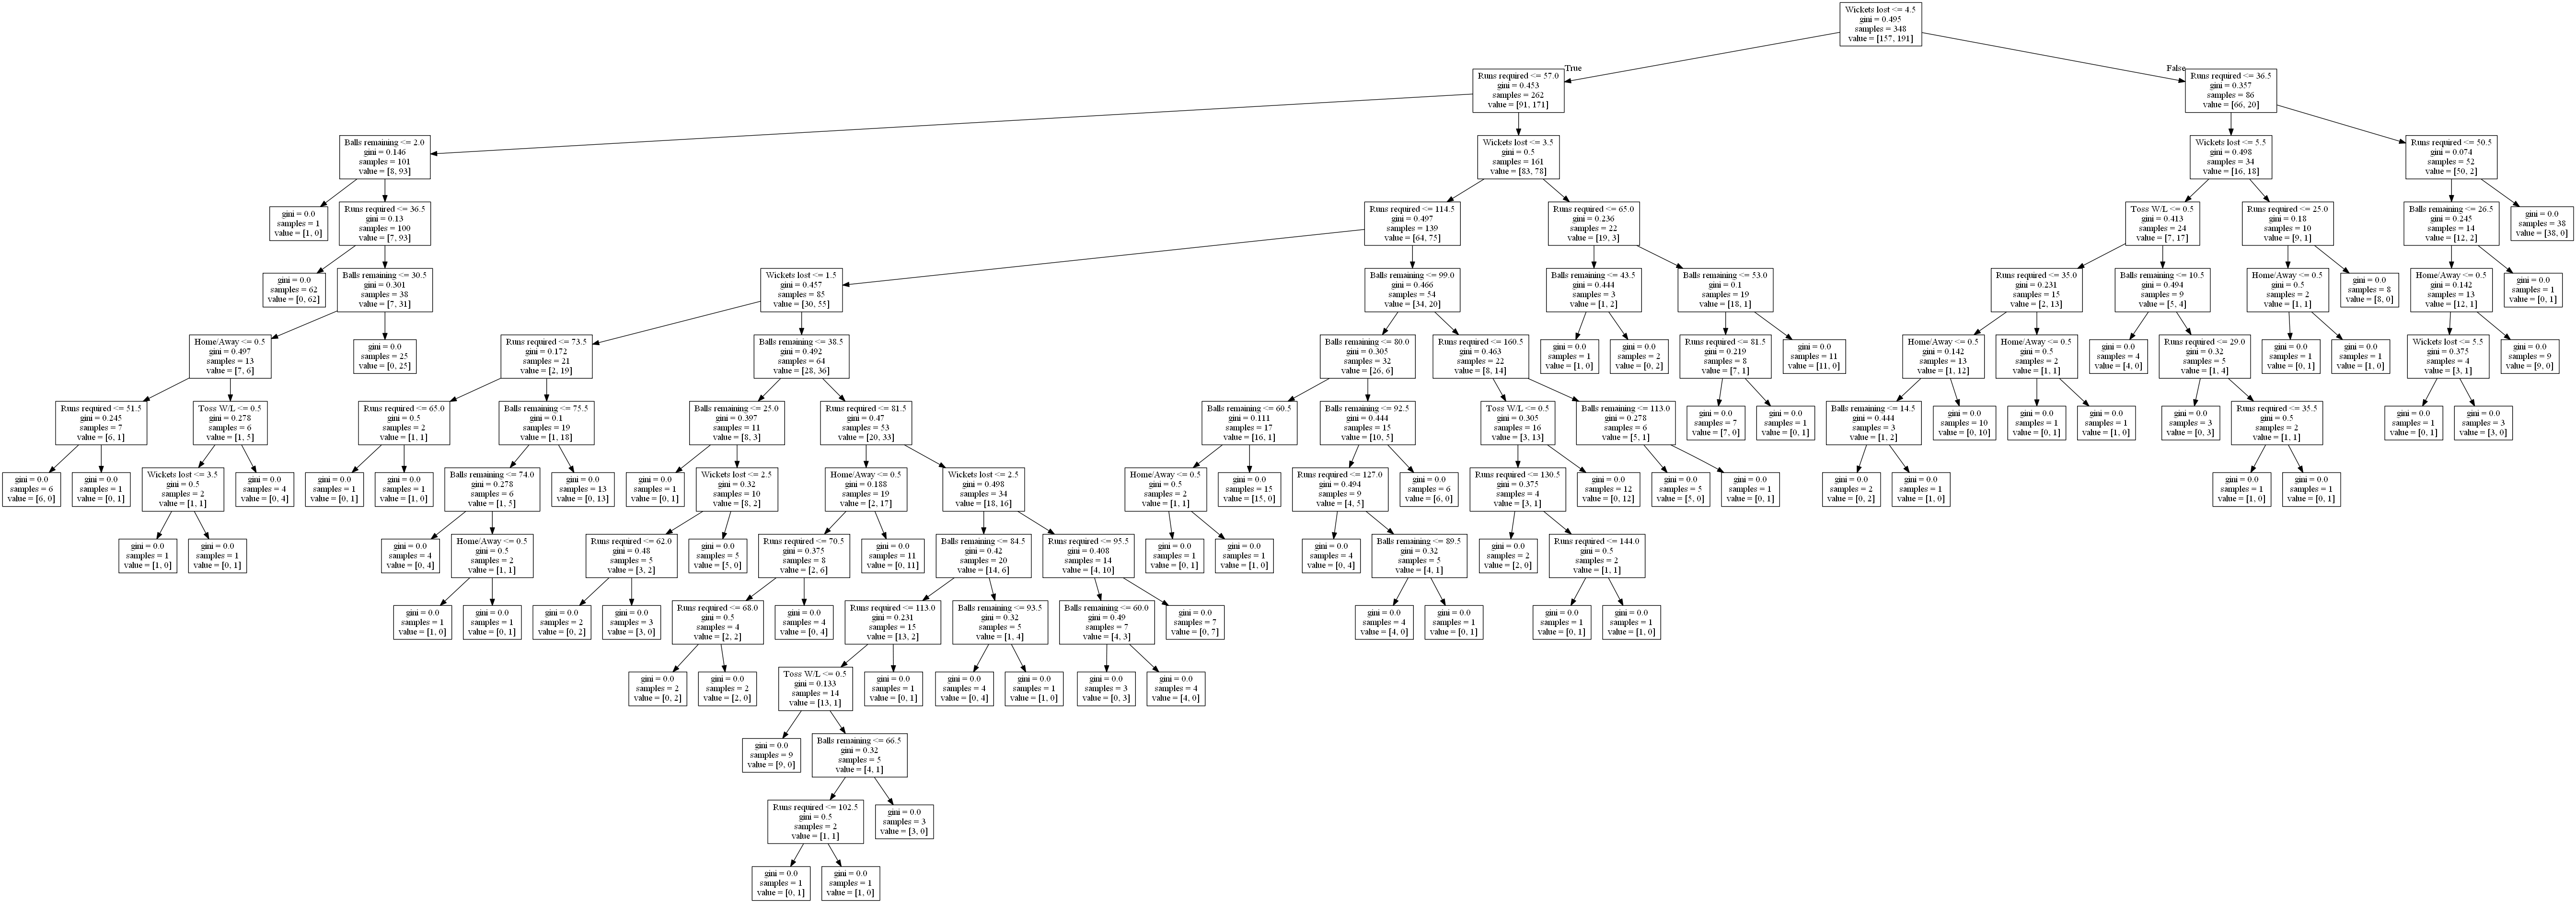

In [45]:
from IPython.display import Image  
# from sklearn.externals.six import StringIO  
from six import StringIO
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
(graph, )  = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300)
clf = clf.fit(X_train,y_train)

In [48]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

y_pred = clf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

70
0.9
0.9411764705882353
[[31  5]
 [ 2 32]]


In [49]:
# Accuracy for the Random Forest Model is 88.6%.

In [54]:
print (clf.predict([[1,84,146,1,0]]))

[0]


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75862069 0.89285714 0.89285714 0.82142857 0.82142857 0.85714286
 0.82142857 0.77777778 0.74074074 0.81481481]
Mean: 0.8199096880131362
Standard Deviation: 0.04884773420057204


In [4]:
# Cross Validation score for the Random Forest Model is 82% with SD = 0.04.

### Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import svm, datasets

X_train, X_test, y_train, y_test = train_test_split(df[features], df.Winner, test_size=0.2, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8285714285714286

In [21]:
scores=cross_val_score(clf,df[features],df.Winner,cv=4)
print(scores)
print(scores.mean())

[0.79545455 0.87356322 0.79310345 0.8372093 ]
0.8248326286116984
